In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps

from config import gkey

In [21]:
census = pd.read_pickle("Intermediate Data/census_with_household.pkl")
census

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489
78653,14631.0,29.5,55073.0,21795.0,19328.0,32.8,60880.0,22020.0,225.0,1.032347,5807.0,10.544187
78660,67630.0,31.6,72137.0,27021.0,81698.0,33.8,78145.0,31515.0,4494.0,16.631509,6008.0,8.328597
78664,51942.0,31.1,62283.0,27852.0,60884.0,32.8,63923.0,27792.0,-60.0,-0.215424,1640.0,2.633142
78681,51409.0,34.3,89900.0,34144.0,56086.0,35.7,98444.0,36096.0,1952.0,5.716963,8544.0,9.503893


In [22]:
#drop outlier
census_drop = census.drop(78712)
census_drop

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489
78653,14631.0,29.5,55073.0,21795.0,19328.0,32.8,60880.0,22020.0,225.0,1.032347,5807.0,10.544187
78660,67630.0,31.6,72137.0,27021.0,81698.0,33.8,78145.0,31515.0,4494.0,16.631509,6008.0,8.328597
78664,51942.0,31.1,62283.0,27852.0,60884.0,32.8,63923.0,27792.0,-60.0,-0.215424,1640.0,2.633142
78681,51409.0,34.3,89900.0,34144.0,56086.0,35.7,98444.0,36096.0,1952.0,5.716963,8544.0,9.503893


In [23]:
census.index

Int64Index([78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681,
            78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721,
            78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730,
            78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739,
            78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
            78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759],
           dtype='int64', name='Zipcodes')

In [24]:
crime_2011 = pd.read_pickle("Intermediate Data/count_zipcode_type_2011.pkl")
crime_2011["Zip Code"] = crime_2011["Zip Code"].map("{:.0f}".format)
crime_2011.head()


,Zip Code,Highest Offense Description,Number of Occurances
0,78610,APPLIC TO REVOKE PROBATION,2
1,78610,BURGLARY OF VEHICLE,1
2,78610,CUSTODY ARREST TRAFFIC WARR,2
3,78610,HARASSMENT,1
4,78610,THEFT,1


In [25]:
crime_2016 = pd.read_pickle("Intermediate Data/count_zipcode_type_2016.pkl")
crime_2016["Zip Code"] = crime_2016["Zip Code"].map("{:.0f}".format)
crime_2016.head()

,Zip Code,Highest Offense Description,Number of Occurances
0,78610,DAMAGE CITY PROP,1
1,78610,DWI .15 BAC OR ABOVE,1
2,78610,FAILURE TO IDENTIFY,1
3,78610,TERRORISTIC THREAT,1
4,78613,AGG ROBBERY/DEADLY WEAPON,1


In [26]:
crime_2011_zipcodes = crime_2011["Zip Code"].unique()
# crime_2011_zipecodes
len(crime_2011_zipcodes)

53

In [27]:
crime_2016_zipcodes = crime_2016["Zip Code"].unique()
# crime_2016_zipecodes
len(crime_2016_zipcodes)

52

In [28]:
zipcode_difference = list(set(crime_2011_zipcodes)-set(crime_2016_zipcodes))
zipcode_difference

['78640']

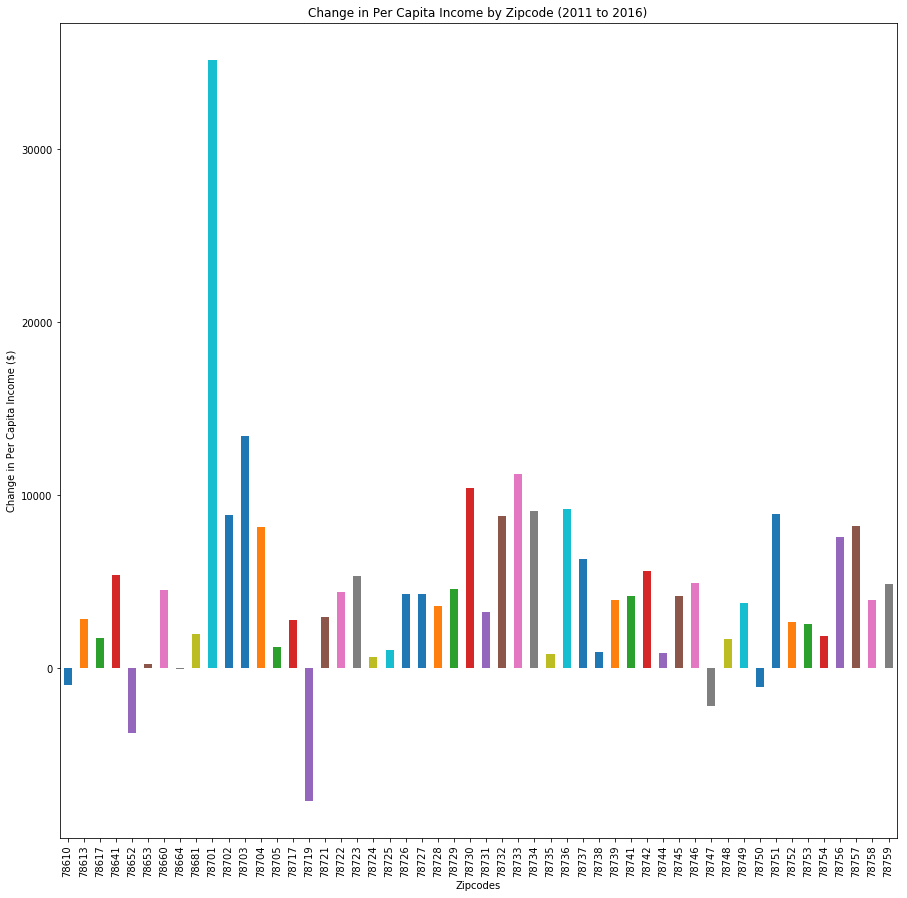

In [29]:
compare_pc_income = census_drop.plot(kind="bar", y="PC Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="Change in Per Capita Income by Zipcode (2011 to 2016)")
compare_pc_income.set_ylabel("Change in Per Capita Income ($)")
compare_pc_income
# plt.savefig("Images/PCIncomeChange.png")

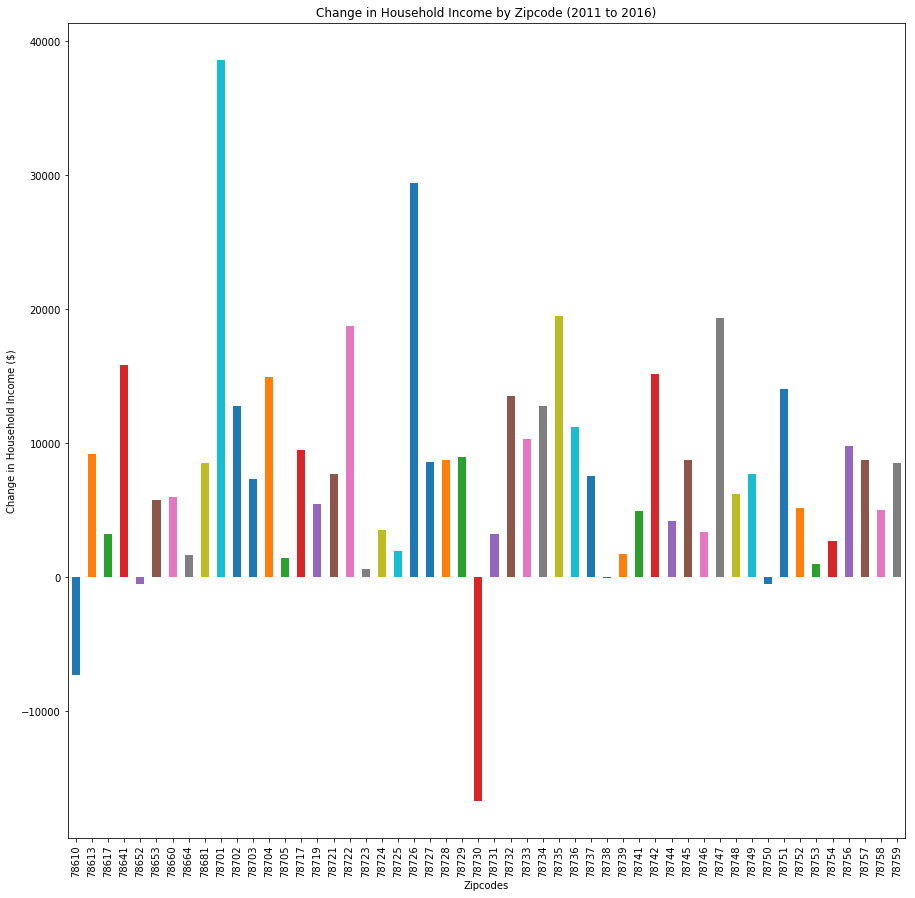

In [30]:
compare_hh_income = census_drop.plot(kind="bar", y="HH Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="Change in Household Income by Zipcode (2011 to 2016)")
compare_hh_income.set_ylabel("Change in Household Income ($)")
compare_hh_income
# plt.savefig("Images/HHIncomeChange.png")

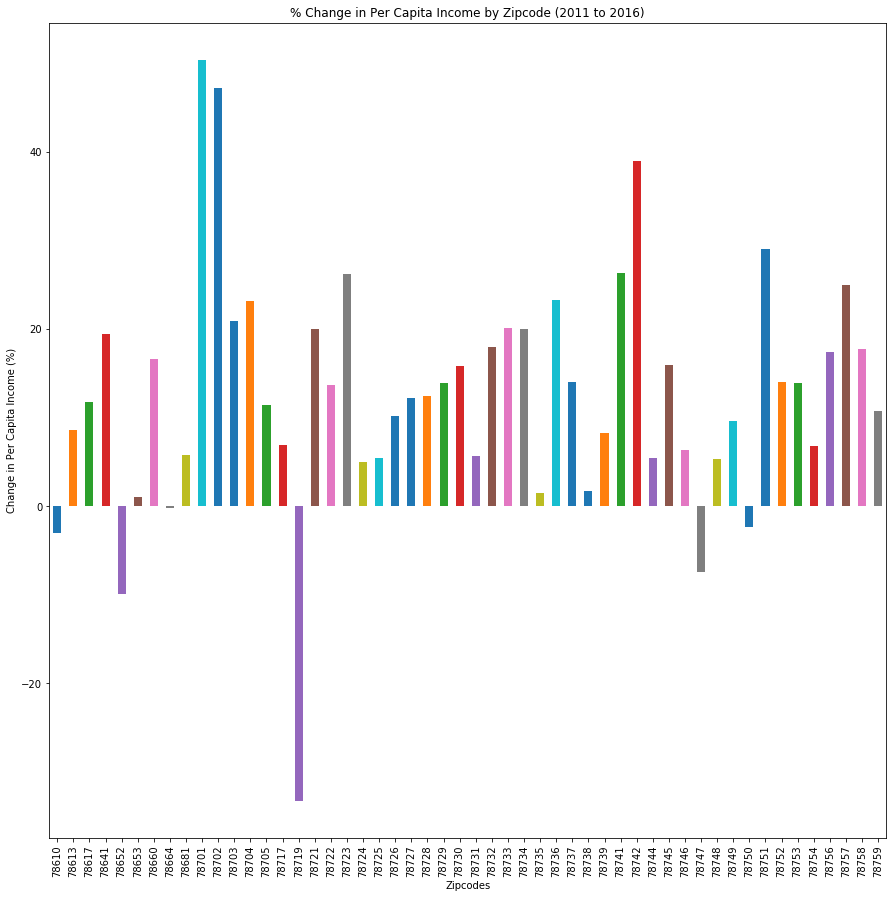

In [31]:
# I think showing % change is a better representation, but I didn't want to delete your without discussing, so I added % Change
compare_pc_income_percent = census_drop.plot(kind="bar", y="PC % Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="% Change in Per Capita Income by Zipcode (2011 to 2016)")
compare_pc_income_percent.set_ylabel("Change in Per Capita Income (%)")
compare_pc_income_percent
# plt.savefig("Images/PCIncomeChangePercent.png")

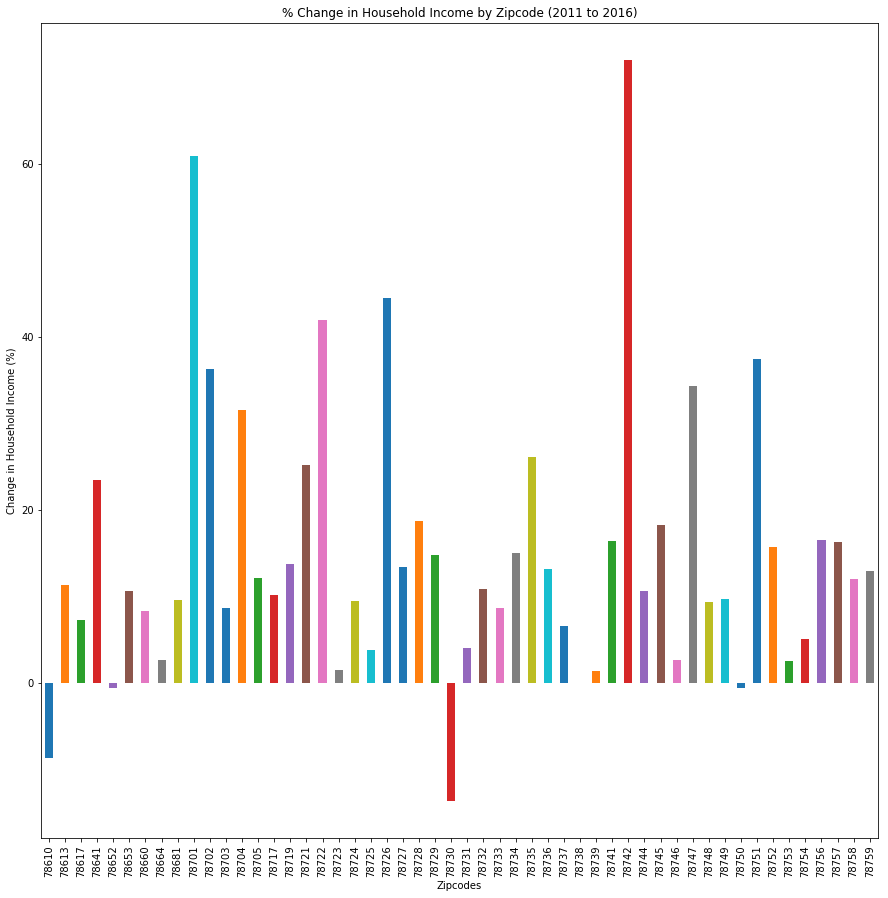

In [32]:
compare_hh_income_percent = census_drop.plot(kind="bar", y="HH % Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="% Change in Household Income by Zipcode (2011 to 2016)")
compare_hh_income_percent.set_ylabel("Change in Household Income (%)")
compare_hh_income_percent
# plt.savefig("Images/HHIncomeChangePercent.png")

In [33]:
# I'd love to compare this to crime rate changes and plot as well
pc_percent_change_sum = census_drop["PC % Income Increase/Decrease"].sum()
pc_percent_change_len = len(census_drop["PC % Income Increase/Decrease"])
pc_average_percent_change = pc_percent_change_sum / pc_percent_change_len
pc_average_percent_change

12.615535919041404

In [34]:
hh_percent_change_sum = census_drop["HH % Income Increase/Decrease"].sum()
hh_percent_change_len = len(census_drop["HH % Income Increase/Decrease"])
hh_average_percent_change = hh_percent_change_sum / hh_percent_change_len
hh_average_percent_change

14.857277632740123

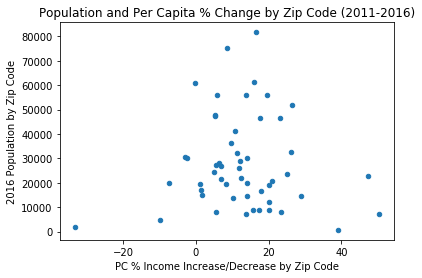

In [35]:
# no significant correlation between Population and PC % Income Increase/Decrease
census_drop.plot(kind="scatter", x="PC % Income Increase/Decrease", y="Population_2016")
plt.title("Population and Per Capita % Change by Zip Code (2011-2016)")
plt.ylabel("2016 Population by Zip Code")
plt.xlabel("PC % Income Increase/Decrease by Zip Code")
# plt.savefig("Images/PCIncomeChangePopulation.png")
plt.show()

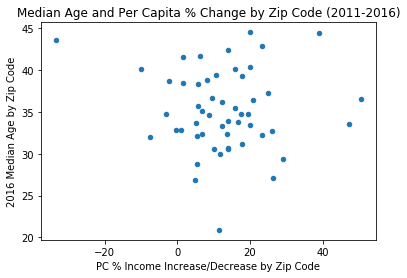

In [36]:
# no significant correlation between Median Age and PC % Income Increase/Decrease
census_drop.plot(kind="scatter", x="PC % Income Increase/Decrease", y="Median Age_2016")
plt.title("Median Age and Per Capita % Change by Zip Code (2011-2016)")
plt.ylabel("2016 Median Age by Zip Code")
plt.xlabel("PC % Income Increase/Decrease by Zip Code")
# plt.savefig("Images/PCIncomeChangeAge.png")
plt.show()

In [37]:
#merge crime dataframes
crime_2011_groupby = crime_2011.groupby("Zip Code")
crime_2011_sum = crime_2011_groupby["Number of Occurances"].sum()
crime_2016_groupby = crime_2016.groupby("Zip Code")
crime_2016_sum = crime_2016_groupby["Number of Occurances"].sum()
crime = pd.DataFrame({
    "Number of Offenses 2011": crime_2011_sum,
    "Number of Offenses 2016": crime_2016_sum,
    "Difference (2011-2016)": crime_2011_sum - crime_2016_sum
})


crime.index.name = "Zipcode"


crime

,Number of Offenses 2011,Number of Offenses 2016,Difference (2011-2016)
Zipcode,,,
78610,7,4.0,3.0
78613,439,505.0,-66.0
78617,1093,941.0,152.0
78640,1,NaN,NaN
78652,33,45.0,-12.0
78653,97,139.0,-42.0
78660,303,393.0,-90.0
78664,10,6.0,4.0
78681,4,4.0,0.0


In [45]:
#need to import filtered_crime_data.pkl
crime_narrowed = pd.read_pickle("Intermediate Data/crime_2011_2016.pkl")
crime_drop = pd.read_pickle("Intermediate Data/filtered_crime_df.pkl")

crime_narrowed_2011 = crime_drop.loc[crime_narrowed["Year"] == 2011]
crime_count_2011 = crime_narrowed_2011["Zip Code"].value_counts()

crime_narrowed_2016 = crime_drop.loc[crime_narrowed["Year"] == 2016]
crime_count_2016 = crime_narrowed_2016["Zip Code"].value_counts()




In [46]:
zipcode_2011 = crime_narrowed_2011["Zip Code"].unique()
zipcode_2016 = crime_narrowed_2016["Zip Code"].unique()
print(len(zipcode_2011))
print(len(zipcode_2016))
zipcode_difference = list(set(zipcode_2011)-set(zipcode_2016))
print(zipcode_difference)

53
52
['78640']


In [47]:
census = pd.read_pickle("Intermediate Data/census_with_household.pkl")
census.index



Int64Index([78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681,
            78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721,
            78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730,
            78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739,
            78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750,
            78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759],
           dtype='int64', name='Zipcodes')

In [48]:
crime_narrowed_2011_drop = crime_narrowed_2011.drop(1394611)
crime_count_2011_drop = crime_narrowed_2011_drop["Zip Code"].value_counts()
df_crime_count = pd.DataFrame({
    "2011": crime_count_2011_drop,
    "2016": crime_count_2016,
    "Change": crime_count_2016 - crime_count_2011_drop,
})

df_crime_count.index.name="Zipcode"
df_crime_count.index

Index(['78610', '78613', '78617', '78652', '78653', '78660', '78664', '78681',
       '78701', '78702', '78703', '78704', '78705', '78712', '78717', '78719',
       '78721', '78722', '78723', '78724', '78725', '78726', '78727', '78728',
       '78729', '78730', '78731', '78732', '78733', '78734', '78735', '78736',
       '78737', '78738', '78739', '78741', '78742', '78744', '78745', '78746',
       '78747', '78748', '78749', '78750', '78751', '78752', '78753', '78754',
       '78756', '78757', '78758', '78759'],
      dtype='object', name='Zipcode')

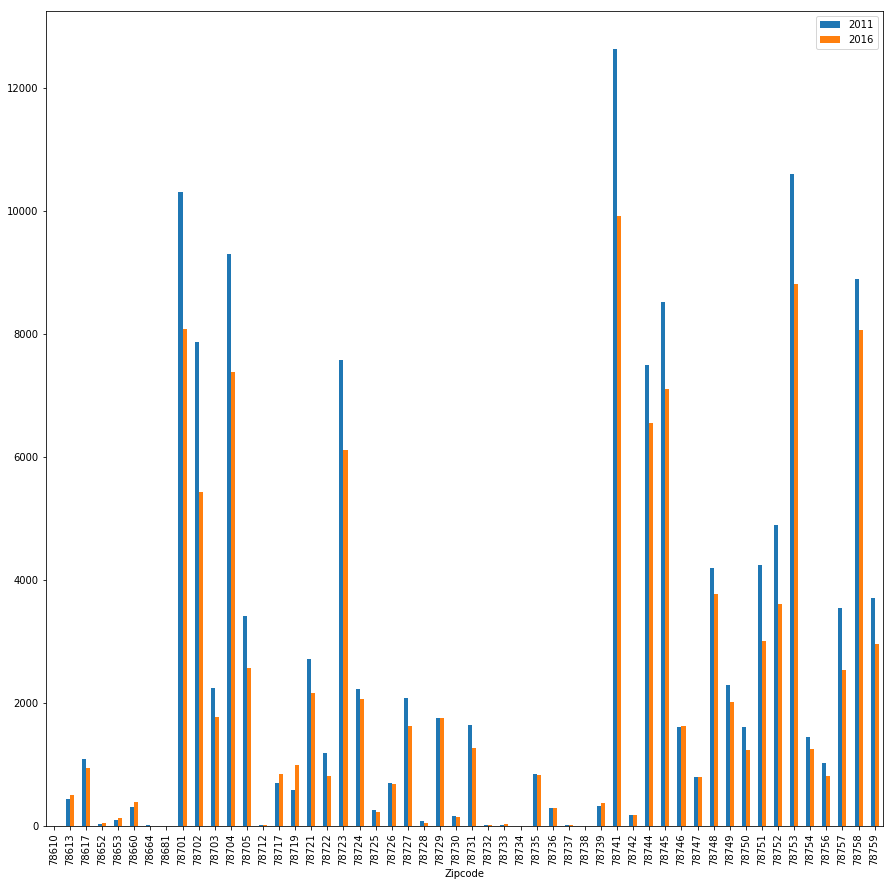

In [49]:
df_crime_count.plot(kind='bar',y=["2011","2016"], figsize=(15,15), fontsize=10)

In [50]:
df_crime_count.index = df_crime_count.index.astype(int)
crime_census = census
crime_census["Crime Count 2011"] = df_crime_count["2011"]
crime_census["Crime Count 2016"] = df_crime_count["2016"]
crime_census["Change in Crime"] = df_crime_count["Change"]
crime_census["% Change in Crime"] = df_crime_count["Change"]/df_crime_count["2011"]*100
crime_census["Population Change"] = crime_census["Population_2016"] - crime_census["Population_2011"]
crime_census["% Population Change"] = crime_census["Population Change"]/crime_census["Population_2011"]*100
crime_census


,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease,Crime Count 2011,Crime Count 2016,Change in Crime,% Change in Crime,Population Change,% Population Change
Zipcodes,,,,,,,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205,7.0,4.0,-3.0,-42.857143,8400.0,38.091783
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443,439.0,505.0,66.0,15.034169,11378.0,17.805668
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282,1093.0,941.0,-152.0,-13.906679,7554.0,40.674133
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650,NaN,NaN,NaN,NaN,12278.0,28.125072
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489,33.0,45.0,12.0,36.363636,663.0,15.578008
78653,14631.0,29.5,55073.0,21795.0,19328.0,32.8,60880.0,22020.0,225.0,1.032347,5807.0,10.544187,97.0,139.0,42.0,43.298969,4697.0,32.103069
78660,67630.0,31.6,72137.0,27021.0,81698.0,33.8,78145.0,31515.0,4494.0,16.631509,6008.0,8.328597,303.0,393.0,90.0,29.702970,14068.0,20.801419
78664,51942.0,31.1,62283.0,27852.0,60884.0,32.8,63923.0,27792.0,-60.0,-0.215424,1640.0,2.633142,10.0,6.0,-4.0,-40.000000,8942.0,17.215356
78681,51409.0,34.3,89900.0,34144.0,56086.0,35.7,98444.0,36096.0,1952.0,5.716963,8544.0,9.503893,4.0,4.0,0.0,0.000000,4677.0,9.097629


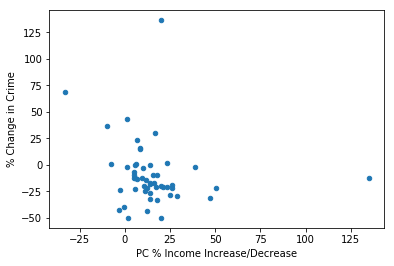

In [51]:
crime_census.plot(kind='scatter', x='PC % Income Increase/Decrease', y="% Change in Crime")
# plt.scatter(x=crime_census['PC % Income Increase/Decrease'], y=crime_census["% Change in Crime"],s=crime_census["% Population Change"]*5)

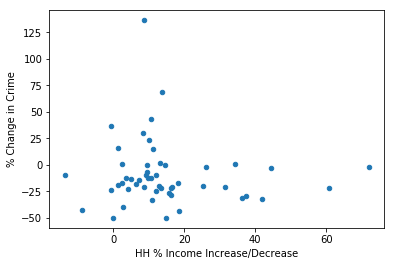

In [52]:
crime_census.plot(kind='scatter', x='HH % Income Increase/Decrease', y="% Change in Crime")

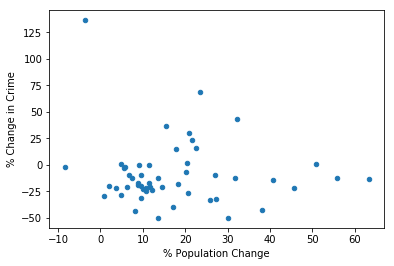

In [53]:
crime_census.plot(kind='scatter', x='% Population Change', y="% Change in Crime")

In [54]:

# print(crime_drop["Location"].nunique())
new_df = crime_drop.dropna()
new_df.count()
locations = list(new_df["Location"])

# new_locations = []
# for x in locations:
#     if str(x) == "nan":
#         new_locations.append(x)
# print(len(locations))
# print(len(new_locations))
# new_locations
new_df.head()

,Zip Code,Year,Highest Offense Description,Latitude,Longitude,Location
1,78723,2011,RUNAWAY CHILD,30.319818,-97.667024,"(30.31981803, -97.66702419)"
3,78746,2011,VIOL CITY ORDINANCE - OTHER,30.266295,-97.766915,"(30.26629453, -97.76691542)"
10,78757,2011,GRAFFITI,30.335580,-97.737100,"(30.33558013, -97.73710007)"
16,78758,2011,DISTURBANCE - OTHER,30.382941,-97.702262,"(30.38294101, -97.70226186)"
17,78723,2011,THEFT BY SHOPLIFTING,30.316393,-97.706150,"(30.31639298, -97.70614968)"


In [56]:
# Customize the size of the figure
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
austin_coord = (30.267,-97.743)


fig = gmaps.figure(center=austin_coord,zoom_level=10, layout=figure_layout)
heatmap_layer = gmaps.heatmap_layer(new_df[["Latitude","Longitude"]])
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…